In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [38]:
selected_col= ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86','mths_since_last_record:>86']

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [40]:
import pickle

with open('selected_col.pkl', 'wb') as f:
    pickle.dump(selected_col, f)

with open('ref_categories.pkl', 'wb') as f:
    pickle.dump(ref_categories, f)

In [4]:
inputs_train_with_ref_cat = loan_data_inputs_train[selected_col]
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)

In [5]:
inputs_test_with_ref_cat = loan_data_inputs_test[selected_col]
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

inputs_train_np = inputs_train.to_numpy()
inputs_test_np = inputs_test.to_numpy()
loan_data_targets_train_np = loan_data_targets_train.to_numpy()
loan_data_targets_test_np = loan_data_targets_test.to_numpy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = inputs_train_np,inputs_test_np,loan_data_targets_train_np,loan_data_targets_test_np

# Calculate class weights for balancing
# class_weights = "balanced"


In [8]:

# Create a random forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train.ravel())

# Get predicted probabilities for each class
proba_predictions = rf_classifier.predict_proba(X_test)

# Set threshold and classify based on probabilities
threshold = 0.9
binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

# Get the classification report
report = classification_report(y_test, binary_predictions)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.74      0.25     10190
           1       0.94      0.50      0.65     83067

    accuracy                           0.53     93257
   macro avg       0.55      0.62      0.45     93257
weighted avg       0.85      0.53      0.61     93257



In [9]:
xg_classifier = xgb.XGBClassifier(n_estimators=1000, random_state=42)

# Train the classifier
xg_classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
proba_predictions = xg_classifier.predict_proba(X_test)

# Set threshold and classify based on probabilities
threshold = 0.9
binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

# Get the classification report
report = classification_report(y_test, binary_predictions)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.61      0.27     10190
           1       0.93      0.63      0.75     83067

    accuracy                           0.63     93257
   macro avg       0.55      0.62      0.51     93257
weighted avg       0.85      0.63      0.70     93257



In [10]:
import lightgbm as lgb


lgb_classifier = lgb.LGBMClassifier(n_estimators=1000, random_state=42)

# Train the classifier
lgb_classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
proba_predictions = lgb_classifier.predict_proba(X_test)

# Set threshold and classify based on probabilities
threshold = 0.9
binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

# Get the classification report
report = classification_report(y_test, binary_predictions)

# Print the classification report
print("Classification Report:\n", report)

C:\Users\Subrata Samanta\miniconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Subrata Samanta\miniconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 332250, number of negative: 40778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 373028, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.890684 -> initscore=2.097745
[LightGBM] [Info] Start training from score 2.097745
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.71      0.27     10190
           1       0.94      0.58      0.72     83067

    accuracy                           0.59     93257
   macro avg       0.56      0.64      0.50     93257
weighted avg       0.86      0.59      0.67     93257



In [11]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(10,10,5,2), max_iter=500, random_state=42)

# Train the classifier
mlp_classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
proba_predictions = mlp_classifier.predict_proba(X_test)

# Set threshold and classify based on probabilities
threshold = 0.9
binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

# Get the classification report
report = classification_report(y_test, binary_predictions)

# Print the classification report
print("Classification Report:\n", report)

C:\Users\Subrata Samanta\miniconda3\envs\mlenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.79      0.26     10190
           1       0.95      0.49      0.65     83067

    accuracy                           0.52     93257
   macro avg       0.55      0.64      0.46     93257
weighted avg       0.86      0.52      0.60     93257



In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Function to generate classification report and additional features
def generate_report(classifier, X_train, X_test, y_train, y_test, threshold=0.9):
    # Train the classifier
    classifier.fit(X_train, y_train.ravel())  # Use ravel() to convert y_train to a 1D array

    # Get predicted probabilities for each class
    proba_predictions = classifier.predict_proba(X_test)

    # Set threshold and classify based on probabilities
    binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

    # Get the classification report
    report = classification_report(y_test, binary_predictions, digits=4, target_names=['Class 0', 'Class 1'], output_dict=True)

    # Additional features
    accuracy = classifier.score(X_test, y_test)
    other_features = {
        'Accuracy': accuracy,
        # Add more relevant features if needed
    }

    return report, other_features

# List of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=1000, random_state=42),
    'LightGBM': lgb.LGBMClassifier(n_estimators=1000, random_state=42),
    'MLP Classifier': MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(10, 10, 5, 2), max_iter=500, random_state=42),
}

# Results table
results_table = []

# Iterate through classifiers
for name, classifier in classifiers.items():
    report, other_features = generate_report(classifier, X_train, X_test, y_train, y_test)
    
    # Append results to the table
    results_table.append({
        'Classifier': name,
        'Precision (Class 0)': report['Class 0']['precision'],
        'Recall (Class 0)': report['Class 0']['recall'],
        'F1-Score (Class 0)': report['Class 0']['f1-score'],
        'Precision (Class 1)': report['Class 1']['precision'],
        'Recall (Class 1)': report['Class 1']['recall'],
        'F1-Score (Class 1)': report['Class 1']['f1-score'],
        'Accuracy': other_features['Accuracy'],
        # Add more columns as needed
    })

# Create a DataFrame
results_df = pd.DataFrame(results_table)

# Display the DataFrame
# print(results_df)


[LightGBM] [Info] Number of positive: 332250, number of negative: 40778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 373028, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.890684 -> initscore=2.097745
[LightGBM] [Info] Start training from score 2.097745
       Classifier  Precision (Class 0)  Recall (Class 0)  F1-Score (Class 0)  \
0   Random Forest             0.152916          0.736310            0.253240   
1         XGBoost             0.169573          0.612659            0.265626   
2        LightGBM             0.170578          0.708243            0.274939   
3  MLP Classifier             0.159230          0.789009            0.264984   

   Precision (Class 1)  Recall (Class 1) 

In [16]:
results_df

,Classifier,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),Accuracy
0,Random Forest,0.152916,0.736310,0.253240,0.939196,0.499645,0.652281,0.890432
1,XGBoost,0.169573,0.612659,0.265626,0.930069,0.631948,0.752559,0.887215
2,LightGBM,0.170578,0.708243,0.274939,0.941646,0.577546,0.715965,0.890593
3,MLP Classifier,0.159230,0.789009,0.264984,0.949724,0.488931,0.645532,0.890732


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import eli5

# Create a random forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train.ravel())

# Get predicted probabilities for each class
proba_predictions = rf_classifier.predict_proba(X_test)

# Set threshold and classify based on probabilities
threshold = 0.9
binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

# Get the classification report
report = classification_report(y_test, binary_predictions)

# Print the classification report
print("Classification Report:\n", report)

# Explain global feature importance
feature_names = list(inputs_train)  # Convert to strings
eli5.explain_weights(rf_classifier, feature_names=feature_names)


Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.74      0.25     10190
           1       0.94      0.50      0.65     83067

    accuracy                           0.53     93257
   macro avg       0.55      0.62      0.45     93257
weighted avg       0.85      0.53      0.61     93257



Weight,Feature
0.0229 ± 0.0024,mths_since_earliest_cr_line:165-247
0.0208 ± 0.0031,verification_status:Source Verified
0.0203 ± 0.0027,total_acc:28-51
0.0196 ± 0.0046,total_rev_hi_lim:10K-20K
0.0195 ± 0.0038,purpose:debt_consolidation
0.0192 ± 0.0018,emp_length:2-4
0.0186 ± 0.0047,emp_length:10
0.0179 ± 0.0093,home_ownership:MORTGAGE
0.0177 ± 0.0081,verification_status:Not Verified
0.0173 ± 0.0018,open_acc:4-12


In [9]:
# Explain local prediction
sample_index = 0  # Replace with the index of the sample you want to explain
eli5.explain_prediction(rf_classifier, X_test[sample_index], feature_names=feature_names)


Explanation(estimator='RandomForestClassifier(random_state=42)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.8906090695604617, std=None, value=1.0), FeatureWeight(feature='int_rate:12.025-15.74', weight=0.014435879908118166, std=None, value=1.0), FeatureWeight(feature='inq_last_6mths:0', weight=0.01321405531833177, std=None, value=1.0), FeatureWeight(feature='dti:16.1-20.3', weight=0.008148588669034519, std=None, value=0.0), FeatureWeight(feature='mths_since_issue_d:40-41', weight=0.008051155337149564, std=None, value=1.0), FeatureWeight(feature='mths_since_issue_d:65-84', weight=0.007304863187251744, std=None, value=0.0), FeatureWeight(feature='annual_inc:40K-50K', weight=0.006281922500134495, std=None, value=0.0), FeatureWeight(feature='inq_last_6mths:1-2', weight=0.00602651190140267, std=None, value=0.0), FeatureWeight(feature='grade:E', weight=0.005983025040225491, std=None, value=0.0), FeatureWeight(feature='mths_since_last_delinq:31-56', weight=0.005360480150913009, std=None, value=0.0), FeatureWeight(feature='grade:C', weight=0.005275841511482745, std=None, value=1.0), FeatureWeight(feature='int_rate:15.74-20.281', weight=0.005161477091510209, std=None, value=0.0), FeatureWeight(feature='home_ownership:MORTGAGE', weight=0.004237359145552276, std=None, value=1.0), FeatureWeight(feature='annual_inc:60K-70K', weight=0.004223568959440662, std=None, value=1.0), FeatureWeight(feature='mths_since_issue_d:53-64', weight=0.004214593008343456, std=None, value=0.0), FeatureWeight(feature='dti:22.4-35', weight=0.003924677133127495, std=None, value=0.0), FeatureWeight(feature='annual_inc:>140K', weight=0.0035572933576577515, std=None, value=0.0), FeatureWeight(feature='annual_inc:100K-120K', weight=0.003251356158607509, std=None, value=0.0), FeatureWeight(feature='annual_inc:30K-40K', weight=0.0030207562160994195, std=None, value=0.0), FeatureWeight(feature='grade:F', weight=0.002868653747680767, std=None, value=0.0), FeatureWeight(feature='mths_since_last_delinq:>=57', weight=0.002738838397609169, std=None, value=0.0), FeatureWeight(feature='annual_inc:50K-60K', weight=0.0026885293585650893, std=None, value=0.0), FeatureWeight(feature='annual_inc:80K-90K', weight=0.0024533858686320554, std=None, value=0.0), FeatureWeight(feature='grade:D', weight=0.002278482160720403, std=None, value=0.0), FeatureWeight(feature='dti:21.7-22.4', weight=0.002249414516583739, std=None, value=0.0), FeatureWeight(feature='total_rev_hi_lim:10K-20K', weight=0.002047269507891093, std=None, value=0.0), FeatureWeight(feature='mths_since_earliest_cr_line:>352', weight=0.002028708621525779, std=None, value=0.0), FeatureWeight(feature='addr_state:NY', weight=0.002026273195353173, std=None, value=0.0), FeatureWeight(feature='open_acc:18-22'

In [18]:
import lime
import lime.lime_tabular
# X_train_np = np.array(X_train)
# X_test_np = np.array(X_test)

explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
feature_names=list(inputs_train),
class_names=[0, 1],
random_state=42)

idx = 10 # Select any index to interpret
exp = explainer.explain_instance(X_test[idx], rf_classifier.predict_proba, num_features=5)

exp.show_in_notebook(show_table=True)

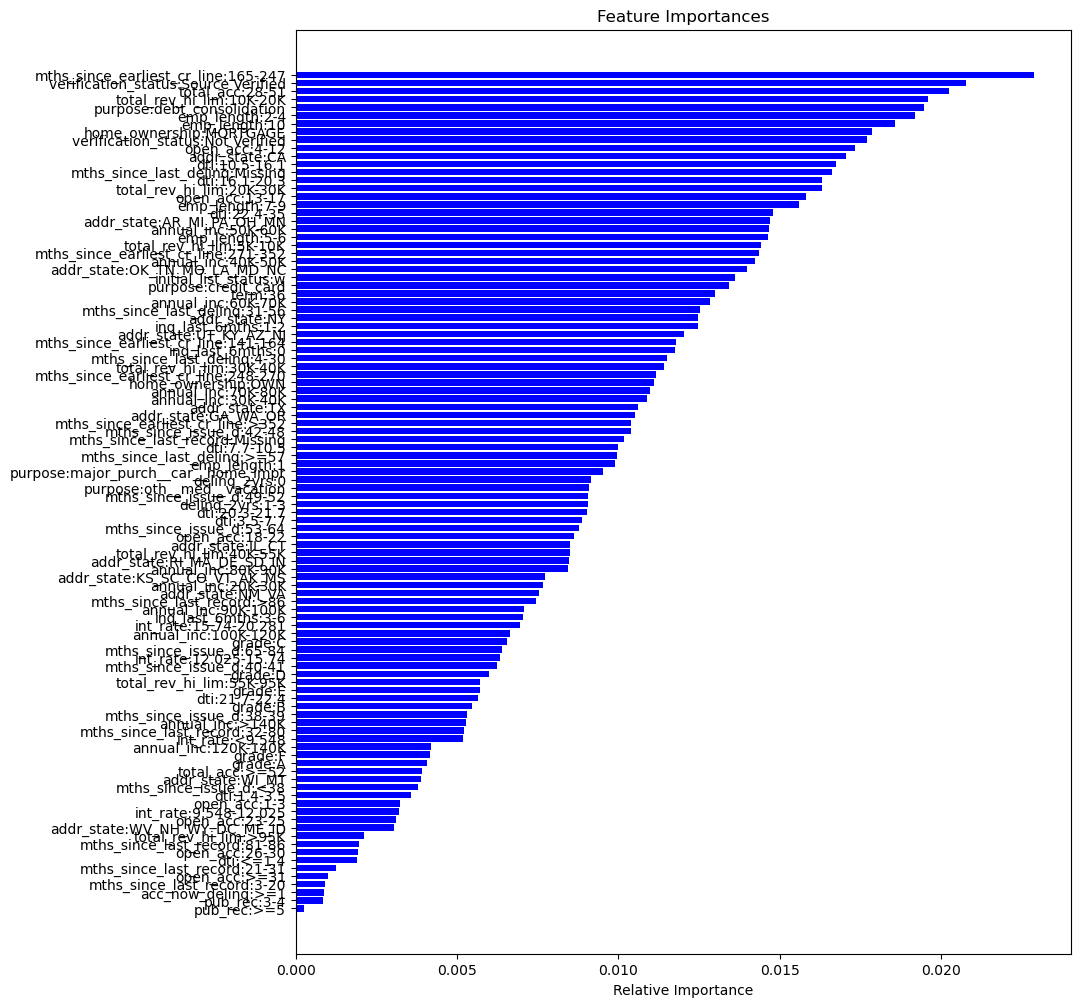

In [20]:
import matplotlib.pyplot as plt

features = feature_names # make sure you have 'feature_names' appropriately defined
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
import joblib
from tqdm import tqdm

# Function to generate classification report and additional features
def generate_report(classifier, X_train, X_test, y_train, y_test, threshold=0.9):
    # Train the classifier
    classifier.fit(X_train, y_train.ravel())  # Use ravel() to convert y_train to a 1D array

    # Get predicted probabilities for each class
    proba_predictions = classifier.predict_proba(X_test)

    # Set threshold and classify based on probabilities
    binary_predictions = (proba_predictions[:, 1] > threshold).astype(int)

    # Get the classification report
    report = classification_report(y_test, binary_predictions, digits=4, target_names=['Class 0', 'Class 1'], output_dict=True)

    # Additional features
    accuracy = classifier.score(X_test, y_test)
    other_features = {
        'Accuracy': accuracy,
        # Add more relevant features if needed
    }

    return report, other_features

# List of classifiers with hyperparameter spaces for random search
classifiers = {
    'Random Forest': (RandomForestClassifier(),
                     {'n_estimators': [100, 200],
                      'max_depth': [None, 10],
                      'min_samples_split': [2, 5],
                      'min_samples_leaf': [1, 2]}),
    
    'XGBoost': (xgb.XGBClassifier(),
                {'n_estimators': [100, 200],
                 'learning_rate': [0.01, 0.1],
                 'max_depth': [3, 4],
                 'subsample': [0.8, 0.9]}),
    
    'LightGBM': (lgb.LGBMClassifier(),
                 {'n_estimators': [100, 200],
                  'learning_rate': [0.01, 0.1],
                  'max_depth': [3, 4],
                  'subsample': [0.8, 0.9]}),
    
    'MLP Classifier': (MLPClassifier(),
                       {'hidden_layer_sizes': [(10, 10), (20, 10)],
                        'alpha': [1e-1, 1e-2],
                        'max_iter': [500, 1000]})
}

# Results table
results_table = []

# Split the data into train and test sets
X_train, X_test, y_train, y_test = inputs_train_np,inputs_test_np,loan_data_targets_train_np,loan_data_targets_test_np

# Iterate through classifiers
for name, (classifier, param_dist) in classifiers.items():
    # Perform random search for hyperparameter tuning with progress bar
    with tqdm(total=5, desc=f'Tuning {name}', position=0, leave=True) as pbar:
        random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=5, cv=3, n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train.ravel())
        pbar.update(5)
    
    # Get the best hyperparameters
    best_params = random_search.best_params_
    
    # Use the best hyperparameters to train the model
    best_classifier = classifier.set_params(**best_params)
    report, other_features = generate_report(best_classifier, X_train, X_test, y_train, y_test)
    
    # Append results to the table
    results_table.append({
        'Classifier': name,
        'Best Hyperparameters': best_params,
        'Precision (Class 0)': report['Class 0']['precision'],
        'Recall (Class 0)': report['Class 0']['recall'],
        'F1-Score (Class 0)': report['Class 0']['f1-score'],
        'Precision (Class 1)': report['Class 1']['precision'],
        'Recall (Class 1)': report['Class 1']['recall'],
        'F1-Score (Class 1)': report['Class 1']['f1-score'],
        'Accuracy': other_features['Accuracy'],
        # Add more columns as needed
    })
    
    # Save the trained model
    joblib.dump(best_classifier, f"{name}_model.joblib")

# Create a DataFrame
results_df = pd.DataFrame(results_table)

# Display the DataFrame
print(results_df)


Tuning LightGBM:   0%|                                                                           | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 332250, number of negative: 40778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 373028, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.890684 -> initscore=2.097745
[LightGBM] [Info] Start training from score 2.097745


Tuning LightGBM: 100%|███████████████████████████████████████████████████████████████████| 5/5 [00:11<00:00,  2.36s/it]


[LightGBM] [Info] Number of positive: 332250, number of negative: 40778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 373028, number of used features: 104
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.890684 -> initscore=2.097745
[LightGBM] [Info] Start training from score 2.097745


Tuning MLP Classifier: 100%|█████████████████████████████████████████████████████████████| 5/5 [01:23<00:00, 16.76s/it]


       Classifier                               Best Hyperparameters  \
0   Random Forest  {'n_estimators': 100, 'min_samples_split': 5, ...   
1         XGBoost  {'subsample': 0.8, 'n_estimators': 200, 'max_d...   
2        LightGBM  {'subsample': 0.8, 'n_estimators': 100, 'max_d...   
3  MLP Classifier  {'max_iter': 1000, 'hidden_layer_sizes': (10, ...   

   Precision (Class 0)  Recall (Class 0)  F1-Score (Class 0)  \
0             0.157744          0.782139            0.262538   
1             0.168975          0.737684            0.274965   
2             0.144653          0.821099            0.245972   
3             0.174400          0.702650            0.279442   

   Precision (Class 1)  Recall (Class 1)  F1-Score (Class 1)  Accuracy  
0             0.948048          0.487703            0.644075  0.890732  
1             0.945193          0.554950            0.699313  0.890743  
2             0.948525          0.404396            0.567040  0.890732  
3             0.941956    

In [36]:
results_df.to_csv('results_df.csv')

In [37]:
results_df

,Classifier,Best Hyperparameters,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),Accuracy
0,Random Forest,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.157744,0.782139,0.262538,0.948048,0.487703,0.644075,0.890732
1,XGBoost,"{'subsample': 0.8, 'n_estimators': 200, 'max_d...",0.168975,0.737684,0.274965,0.945193,0.554950,0.699313,0.890743
2,LightGBM,"{'subsample': 0.8, 'n_estimators': 100, 'max_d...",0.144653,0.821099,0.245972,0.948525,0.404396,0.567040,0.890732
3,MLP Classifier,"{'max_iter': 1000, 'hidden_layer_sizes': (10, ...",0.174400,0.702650,0.279442,0.941956,0.591956,0.727025,0.890796
